1. You need to calculate the monthly sales of the store and identify which month had the
highest sales and which month had the lowest sales.
2. You need to analyze sales based on product categories and determine which category has
the lowest sales and which category has the highest sales.
3. The sales analysis needs to be done based on sub-categories.
4. You need to analyze the monthly profit from sales and determine which month had the
highest profit.
5. Analyze the profit by category and sub-category.
6. Analyze the sales and profit by customer segment
7. Analyze the sales to profit ratio

In [3]:
#pip install plotly

In [4]:
import pandas as pd #dataframe
import plotly.express as px #for data visualization 
import plotly.graph_objects as go #for advance and customize graphs
import plotly.io as pio # for templates
import plotly.colors as colors #for colors
pio.templates.default = "plotly_white"

In [5]:
df = pd.read_csv("Sample - Superstore.csv", encoding="latin1")

In [6]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06-12-2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [8]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [9]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     4042 non-null   datetime64[ns]
 3   Ship Date      3898 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [11]:
df[['Order Date', 'Ship Date']].head()

,Order Date,Ship Date
0,2016-11-08,2016-11-11
1,2016-11-08,2016-11-11
2,2016-06-12,NaT
3,2015-10-11,NaT
4,2015-10-11,NaT


In [12]:
df['Order Month'] = df['Order Date'].dt.month.astype("Int64")
df['Order Year'] = df['Order Date'].dt.year.astype("Int64")
df['Order Day of the Week'] = df['Order Date'].dt.dayofweek.astype("Int64")


In [13]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Day of the Week
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2016,1
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2016,1
2,3,CA-2016-138688,2016-06-12,NaT,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2016,6
3,4,US-2015-108966,2015-10-11,NaT,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015,6
4,5,US-2015-108966,2015-10-11,NaT,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2015,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,NaT,NaT,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,<NA>,<NA>,<NA>
9990,9991,CA-2017-121258,NaT,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,<NA>,<NA>,<NA>
9991,9992,CA-2017-121258,NaT,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,<NA>,<NA>,<NA>
9992,9993,CA-2017-121258,NaT,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,<NA>,<NA>,<NA>


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Row ID                 9994 non-null   int64         
 1   Order ID               9994 non-null   object        
 2   Order Date             4042 non-null   datetime64[ns]
 3   Ship Date              3898 non-null   datetime64[ns]
 4   Ship Mode              9994 non-null   object        
 5   Customer ID            9994 non-null   object        
 6   Customer Name          9994 non-null   object        
 7   Segment                9994 non-null   object        
 8   Country                9994 non-null   object        
 9   City                   9994 non-null   object        
 10  State                  9994 non-null   object        
 11  Postal Code            9994 non-null   int64         
 12  Region                 9994 non-null   object        
 13  Pro

In [15]:
sales_by_month = df.groupby('Order Month')['Sales'].sum().reset_index()
fig = px.line(sales_by_month,x='Order Month', y = 'Sales',title= ' Monthly Sales Analysis')
fig.show()

1. You need to calculate the monthly sales of the store and identify which month had the
highest sales and which month had the lowest sales.
- Therefore December has the highest Sales and January as the lowest Sales

In [17]:
sales_by_category = df.groupby('Category')['Sales'].sum().reset_index()

In [18]:
sales_by_category

,Category,Sales
0,Furniture,741999.7953
1,Office Supplies,719047.0320
2,Technology,836154.0330


In [19]:
fig= px.pie(sales_by_category,
           values='Sales',
           names='Category',
            hole=0.5,
           color_discrete_map=px.colors.qualitative.Pastel)
fig.update_traces(textposition = 'inside', textinfo= 'percent+label')
fig.update_layout(title_text ='Sales Analysis by Category', title_font=dict(size=24))
fig.show()

2. You need to analyze sales based on product categories and determine which category has
the lowest sales and which category has the highest sales.

- the lowest sales are in the Office Category which are 31.3%
- the highest sales are in the Technology Category which are 36.4%

In [21]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Day of the Week
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2016,1
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2016,1
2,3,CA-2016-138688,2016-06-12,NaT,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2016,6
3,4,US-2015-108966,2015-10-11,NaT,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015,6
4,5,US-2015-108966,2015-10-11,NaT,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2015,6


In [22]:
sales_by_subcategory= df.groupby('Sub-Category')['Sales'].sum().reset_index()
print(sales_by_subcategory)

   Sub-Category        Sales
0   Accessories  167380.3180
1    Appliances  107532.1610
2           Art   27118.7920
3       Binders  203412.7330
4     Bookcases  114879.9963
5        Chairs  328449.1030
6       Copiers  149528.0300
7     Envelopes   16476.4020
8     Fasteners    3024.2800
9   Furnishings   91705.1640
10       Labels   12486.3120
11     Machines  189238.6310
12        Paper   78479.2060
13       Phones  330007.0540
14      Storage  223843.6080
15     Supplies   46673.5380
16       Tables  206965.5320


In [23]:
fig= px.bar(sales_by_subcategory,
           y='Sales',
           x='Sub-Category',
           title ='Sales Analysis by Sub-Category')
fig.show()

3. The sales analysis needs to be done based on sub-categories.
   
- The highest item sold is PHones
- the lowest item sold is Fasteners

In [25]:
profit_by_month = df.groupby("Order Month")['Profit'].sum().reset_index()
fig = px.line(profit_by_month, x = 'Order Month', y = 'Profit', title="Monthly Profit Analysis")
fig.show()

4. You need to analyze the monthly profit from sales and determine which month had the
highest profit.

- THe month of December had the Highest Profit

In [27]:
profit_by_category = df.groupby('Category')['Profit'].sum().reset_index()
fig = px.pie(profit_by_category,
            names= 'Category', 
            values=  'Profit', 
             hole=0.1, 
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_traces(textposition = 'inside', textinfo='percent+label')
fig.update_layout(title_text = 'Profit Analysis by Category',title_font=dict(size=24))
fig.show()

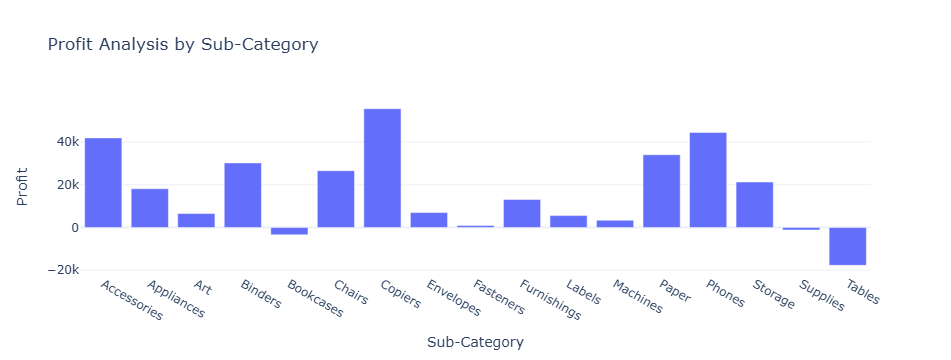

In [28]:
Profit_by_subcategory= df.groupby('Sub-Category')['Profit'].sum().reset_index()

fig= px.bar(Profit_by_subcategory,
           y='Profit',
           x='Sub-Category',
           title ='Profit Analysis by Sub-Category')
fig.show()

5. Analyze the profit by category and sub-category.

- therefore Categorywise the profits are Technology > Office Suppies > Furniture
- the profits by sub-categorywise are Copiers > Phones > > > Tales 

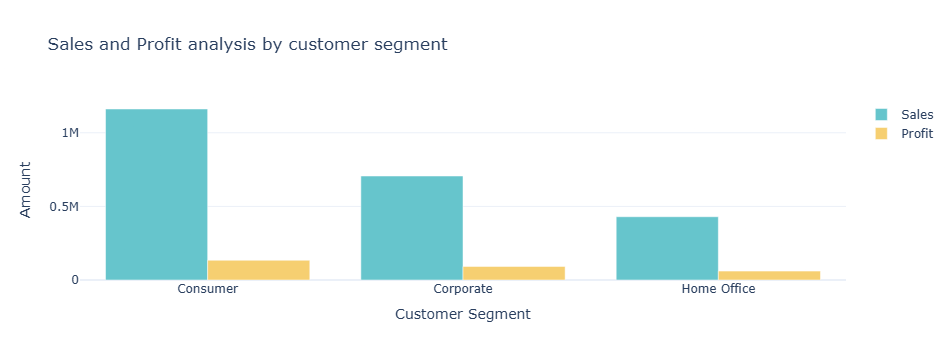

In [30]:
sales_profit_by_segment = df.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
color_palette= colors.qualitative.Pastel

fig=go.Figure()
fig.add_trace(go.Bar(x=sales_profit_by_segment['Segment'],
                    y=sales_profit_by_segment['Sales'],
                    name='Sales',
                    marker_color = color_palette[0]))

fig.add_trace(go.Bar(x=sales_profit_by_segment['Segment'],
                    y=sales_profit_by_segment['Profit'],
                    name='Profit',
                    marker_color = color_palette[1]))

fig.update_layout(title="Sales and Profit analysis by customer segment", 
                 xaxis_title="Customer Segment",
                 yaxis_title="Amount")
fig.show()

6. Analyze the sales and profit by customer segment

In [59]:
sales_profit_by_segment=df.groupby('Segment').agg({'Sales':'sum','Profit':'sum'}).reset_index()
sales_profit_by_segment['Sales_to_profit_ratio']=sales_profit_by_segment['Sales']/ sales_profit_by_segment['Profit']
print(sales_profit_by_segment[['Segment','Sales_to_profit_ratio']])

       Segment  Sales_to_profit_ratio
0     Consumer               8.659471
1    Corporate               7.677245
2  Home Office               7.125416


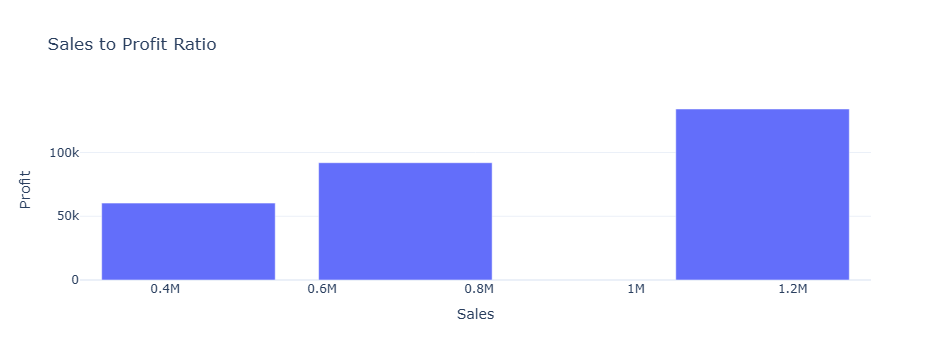

In [61]:
fig = px.bar(sales_profit_by_segment,
             x='Sales',
             y='Profit', 
             title="Sales to Profit Ratio"
)
fig.show()

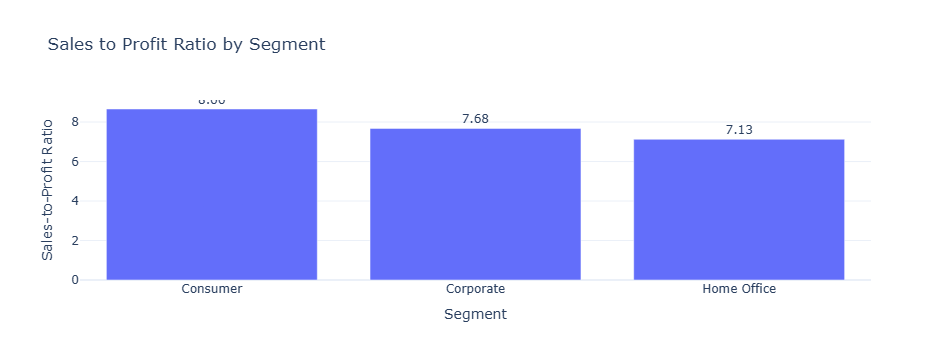

In [63]:
fig = px.bar(
    sales_profit_by_segment,
    x='Segment',
    y='Sales_to_profit_ratio',
    text='Sales_to_profit_ratio',
    title='Sales to Profit Ratio by Segment'
)

# Show ratio values with 2 decimals
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

# Adjust layout
fig.update_layout(
    yaxis_title="Sales-to-Profit Ratio",
    xaxis_title="Segment",
    uniformtext_minsize=8,
    uniformtext_mode='hide'
)

fig.show()

7. Analyze the sales to profit ratio